# 时间序列测试

In [3]:
# 数据接口 
import akshare as ak
import baostock as bs
import tushare as ts

# 基础模块
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# 时间序列模块
import statsmodels
import pmdarima as pm

# 基础函数
import utilsJ

### 读取数据

In [10]:
s_code = '000166.SZ'
df = pd.read_csv('C:\\Users\\a\\Desktop\\Backtrader\\Data\\2019\\'+s_code+'.csv', 
                converters={'trade_date':lambda x:pd.to_datetime(x)})

### EDA

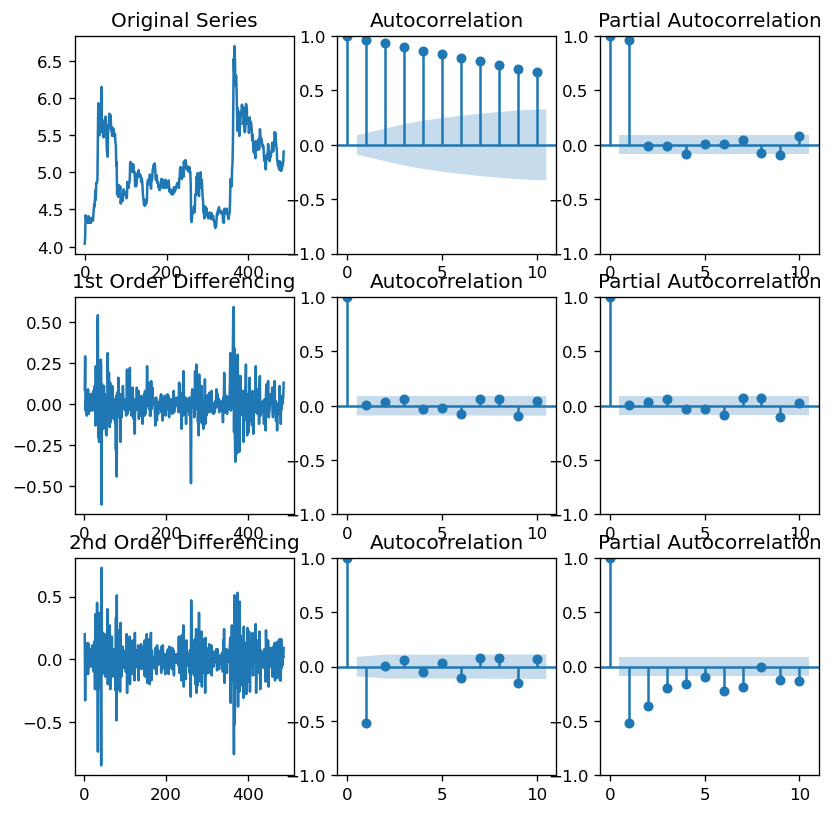

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(df.close); axes[0, 0].set_title('Original Series')
plot_acf(df.close, lags=10, ax=axes[0, 1])
plot_pacf(df.close, lags=10, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.close.diff().dropna(), lags=10, ax=axes[1, 1])
plot_pacf(df.close.diff().dropna(), lags=10, ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.close.diff().diff().dropna(), lags=10, ax=axes[2, 1])
plot_pacf(df.close.diff().diff().dropna(), lags=10, ax=axes[2, 2])

plt.show()

### ARIMA 模型

In [48]:
model = pm.auto_arima(df.close, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-751.697, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-755.644, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-753.699, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-753.696, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-757.386, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.346 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  487
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 379.693
Date:                Wed, 12 Oct 2022   AIC                           -757.386
Time:                        09:26:11   BIC                           -753.200
Sample:                             0   HQIC                          -755.742
                                - 487                                       